<img src = "https://imgur.com/HE0kDhA.jpg"  align = "center">

# **Artificial Neural Network**

Artificial Neural Network, biasa disingkat menjadi ANN atau NN, adalah salah satu metode machine learning yang biasa digunakan untuk kasus klasifikasi. Metode ini termasuk ke dalam jenis supervised learning, sehingga membutuhkan data latih untuk proses learning-nya. Dalam bahasa Indonesia, NN diterjemahkan menjadi Jaringan Saraf Tiruan (JST). Tapi dalam modul ini, kita akan menggunakan istilah NN untuk merujuk kepada metode tersebut.



![alt text](https://imgur.com/9qXTJ8j.jpg)

Struktur NN terinspirasi dari model jaringan saraf yang ada pada otak manusia. Dalam sel saraf manusia, terdapat bagian yang disebut dendrite, yang tugasnya adalah untuk menerima rangsangan (*inputs*). Rangsangan tersebut kemudian dibawa ke nucleus, dan hasilnya (*outputs*) akan dihantarkan oleh axon.

Pada NN, struktur sel saraf manusia tersebut direpresentasikan dalam bentuk sebagai berikut:

![alt text](https://imgur.com/PQYoeXL.jpg)

Pada gambar di atas, terlihat bahwa NN digambarkan sebagai sebuah directed graph yang memiliki *nodes* dan *edges*, sehingga terlihat seperti sebuah jaringan (*Network*). Layer *inputs* akan menerima nilai dari atribut-atribut suatu data. Kemudian nilai dari tiap atribut tersebut akan diberikan bobot, dan diteruskan ke hidden layer. Nilai yang sudah terbobot ini kemudian akan terus-menerus digabungkan dan diberikan bobot lagi hingga sampai ke layer *outputs* untuk dikeluarkan. Hasil yang dikeluarkan oleh skema ini biasanya berupa nilai probabilitas yang menentukan data, yang diinputkan tadi, termasuk dalam kelas apa.


# Perceptron for Linearly Separable Classification

Perhatikan gambar kasus logika komputasi **AND** dan **OR** di bawah ini:

![alt text](https://imgur.com/k0L8wAK.jpg)

Apa kesamaan dari kedua kasus di atas? Yup, terlihat bahwa kedua kasus itu memisahkan dua buah kelas (merah dan biru) secara linear. Hanya dengan bantuan sebuah garis lurus, kedua data dengan kelas yang berbeda dapat terpisah secara sempurna. Inilah yang disebut sebagai *Linearly Separable Classification*.

Dalam NN, kasus di atas bisa diselesaikan dengan **Perceptron**. Perceptron adalah skema NN yang paling sederhana, karena hanya terdiri dari dua layer, yakni layer *input* dan *output*. Gambar berikut adalah skema jaringan perceptron.

![alt text](https://imgur.com/2piXnl8.jpg)



# Multi Layer Perceptron

Perceptron memang efektif untuk mengatasi permasalahan yang linearly separable. Akan tetapi, banyak sekali kasus di dunia nyata yang tidak bisa dipisahkan secara linear. Seperti pengelompokan gambar, pengelompokan dokumen, dan lain sebagainya. Kasus-kasus seperti ini dikenal dengan istilah Non-linearny Separable. Gambar di bawah menunjukkan contoh kasus non-linearly separable

![alt text](https://i.imgur.com/4lOnOdV.png)

Pada gambar di atas, data bintang dan lingkaran tidak bisa dipisahkan secara linear dengan 1 garis. Sehingga kasus ini dikategorikan sebagai non-linearly separable. Untuk menangani kasus seperti ini, perceptron tidak bisa digunakan. Oleh karena itu, digunakan model MLP (Multi Layer Preceptron). Konsep dari MLP pada dasarnya mirip dengan perceptron, hanya saja MLP memiliki layer tambahan di antara layer input dan layer output. Layer ini disebut dengan hidden layer, seperti yang dapat dilihat pada gambar di bawah.

![alt text](https://i.imgur.com/MsqGpYr.png)



---



---



# Langkah Praktikum

Pada praktikum kali ini, kita akan coba mengklasifikasikan data image menggunakan MLP. Dataset yang kita gunakan adalah "Cats and Dogs Dataset". Dataset ini berisi 3000 gambar kucing dan anjing. Perhatikan langkah-langkah dalam melakukan proses klasifikasi sebagai berikut

<h3>Load Dataset</h3>

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-26 01:21:03--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.26.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.26.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   153MB/s    in 0.4s    

2020-07-26 01:21:04 (153 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
# Cek penamaan image yang ada di folder train_cats_dir dan train_dogs_dir
print(os.listdir(train_cats_dir)[:10])
print(os.listdir(train_dogs_dir)[:10])

['cat.696.jpg', 'cat.176.jpg', 'cat.168.jpg', 'cat.980.jpg', 'cat.63.jpg', 'cat.218.jpg', 'cat.621.jpg', 'cat.268.jpg', 'cat.869.jpg', 'cat.782.jpg']
['dog.588.jpg', 'dog.294.jpg', 'dog.365.jpg', 'dog.200.jpg', 'dog.262.jpg', 'dog.611.jpg', 'dog.664.jpg', 'dog.91.jpg', 'dog.93.jpg', 'dog.762.jpg']


In [ ]:
# Cek jumlah data train dan data validation
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


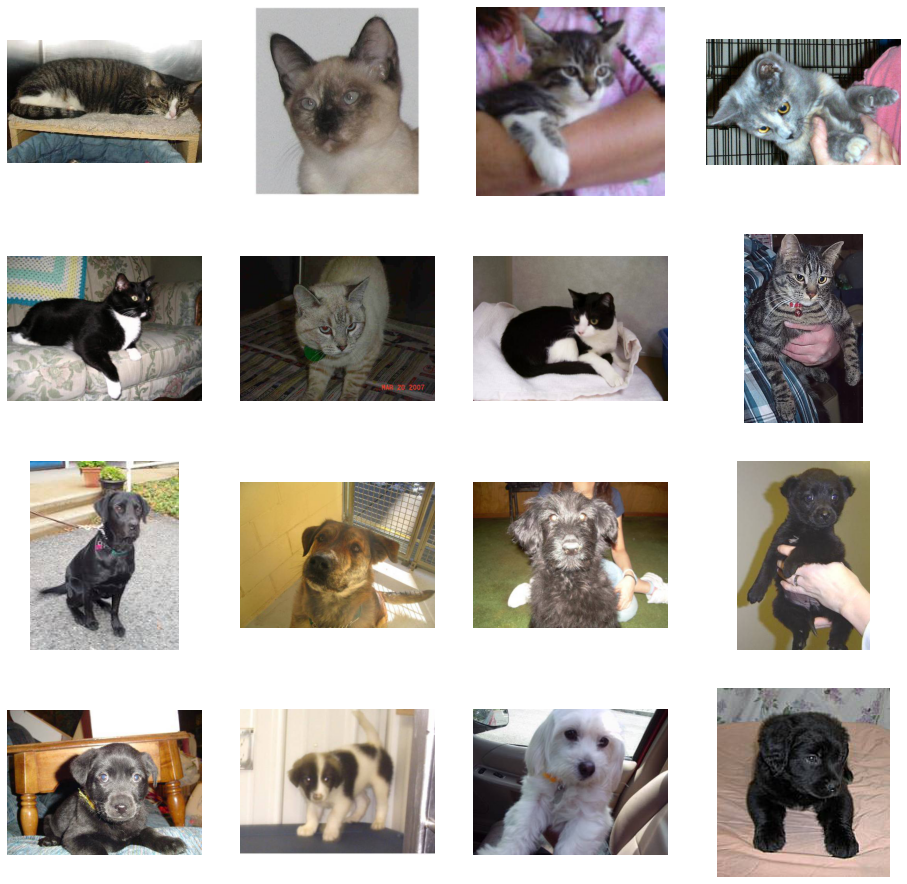

In [ ]:
# Tampilkan 8 image per kelas dengan ukuran 4x4 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in os.listdir(train_cats_dir)[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in os.listdir(train_dogs_dir)[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2000, 150, 150, 3)
Train Label =  (2000,)
Validation Data =  (1000, 150, 150, 3)
Validation Label =  (1000,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [206 214 221]
Data setelah di-normalisasi  [0.80784315 0.8392157  0.8666667 ]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cats' 'cats' 'cats' 'cats' 'cats' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
# Buat model dengan 1 input layer, 1 hidden layer, dan 1 output layer
img_input = layers.Input(shape=(150, 150, 3)) # layer input
x = layers.Flatten()(img_input) # ubah dari matriks 150x150x3 menjadi vektor
x = layers.Dense(128, activation='relu')(x) # hidden layer 1 dengan 128 neuron
output = layers.Dense(1, activation='sigmoid')(x) # output layer dengan 1 neuron (binary)

# Definisikan modelnya
model = Model(img_input, output)

In [ ]:
# Tampilkan model summary
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               8640128   
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 8,640,257
Trainable params: 8,640,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

<h3>Training</h3>

In [ ]:
H = model.fit(x_train, y_train, batch_size=20, epochs=50, validation_data=(x_val, y_val))

Epoch 1/50
100/100 [==============================] - 5s 52ms/step - loss: 3.8631 - acc: 0.5150 - val_loss: 3.3505 - val_acc: 0.5080
Epoch 2/50
100/100 [==============================] - 5s 50ms/step - loss: 2.0345 - acc: 0.5720 - val_loss: 3.2102 - val_acc: 0.5080
Epoch 3/50
100/100 [==============================] - 5s 50ms/step - loss: 1.9184 - acc: 0.5960 - val_loss: 2.0018 - val_acc: 0.5440
Epoch 4/50
100/100 [==============================] - 5s 50ms/step - loss: 1.9775 - acc: 0.5930 - val_loss: 3.3992 - val_acc: 0.5100
Epoch 5/50
100/100 [==============================] - 5s 50ms/step - loss: 1.2724 - acc: 0.6175 - val_loss: 1.8606 - val_acc: 0.5310
Epoch 6/50
100/100 [==============================] - 5s 50ms/step - loss: 1.0055 - acc: 0.6385 - val_loss: 0.8923 - val_acc: 0.5670
Epoch 7/50
100/100 [==============================] - 5s 51ms/step - loss: 0.9702 - acc: 0.6495 - val_loss: 1.7019 - val_acc: 0.5110
Epoch 8/50
100/100 [==============================] - 5s 52ms/step - 

<h3>Evaluasi Model</h3>

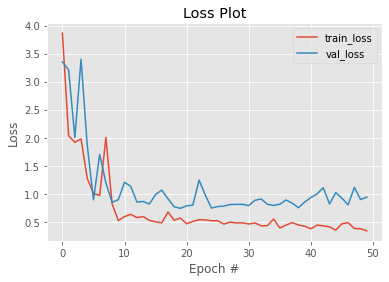

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

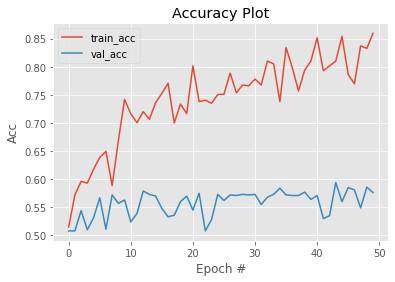

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61       500
           1       0.59      0.48      0.53       500

    accuracy                           0.58      1000
   macro avg       0.58      0.58      0.57      1000
weighted avg       0.58      0.58      0.57      1000

